In [52]:
#https://github.com/HurinHu/GoogleNews/blob/master/README.md
from datetime import datetime
import numpy as np
import pandas as pd
import time
import re
from tqdm import tqdm
import json 
from GoogleNews import GoogleNews
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Stichwortsuche Google Robert Enke

In [254]:
googlenews = GoogleNews(lang='de',period="d",start='01/01/2009',end='12/31/2019')

In [255]:
googlenews.search('allintext:"Robert Enke"')

In [256]:
attributes=["title","media","date","description","link"]
json_list=[]

for page_no in tqdm(range(1,200)):
    googlenews.getpage(page_no)
    for search_result in googlenews.result():
        json_file={k:np.nan for k in attributes}

        json_file["title"]=search_result["title"]
        json_file["media"]=search_result["media"]
        json_file["date"]=search_result["date"]
        json_file["description"]=search_result["desc"]
        json_file["link"]=search_result["link"]

        json_list.append(json_file)
    googlenews.clear()



  0%|          | 0/199 [00:00<?, ?it/s]

  1%|          | 1/199 [00:06<22:13,  6.73s/it]

  1%|          | 2/199 [00:08<17:26,  5.31s/it]

  2%|▏         | 3/199 [00:10<13:46,  4.22s/it]

  2%|▏         | 4/199 [00:16<15:24,  4.74s/it]

  3%|▎         | 5/199 [00:18<12:40,  3.92s/it]

  3%|▎         | 6/199 [00:21<12:04,  3.76s/it]

  4%|▎         | 7/199 [00:25<12:03,  3.77s/it]

  4%|▍         | 8/199 [00:27<10:41,  3.36s/it]

  5%|▍         | 9/199 [00:30<09:43,  3.07s/it]

  5%|▌         | 10/199 [00:31<07:29,  2.38s/it]

  6%|▌         | 11/199 [00:32<06:23,  2.04s/it]

  6%|▌         | 12/199 [00:33<05:25,  1.74s/it]

  7%|▋         | 13/199 [00:34<04:43,  1.53s/it]

  7%|▋         | 14/199 [00:35<04:30,  1.46s/it]

  8%|▊         | 15/199 [00:36<04:05,  1.33s/it]

  8%|▊         | 16/199 [00:38<04:32,  1.49s/it]

  9%|▊         | 17/199 [00:41<05:21,  1.77s/it]

  9%|▉         | 18/199 [00:44<06:28,  2.15s/it]

 10%|▉         | 19/199 [00:46<06:39,  2.22s/it]

 10%|█         |

KeyboardInterrupt: 

In [ ]:
df=pd.DataFrame(json_list)

In [227]:
df.shape

(279, 5)

In [228]:
df.head()

,title,media,date,description,link
0,Depression im Sport: Robert Enke ist kein Einz...,NDR.de,7 nov. 2019,,https://www.ndr.de/sport/fussball/Depression-i...
1,„Ich saß auf demselben Platz wie Robert“ : Mar...,Tagesspiegel,9 nov. 2019,,https://www.tagesspiegel.de/sport/ich-sass-auf...
2,Sport ist signifikant wirksam,Pharmazeutische Zeitung online,21 févr. 2018,Bewegung wird daher auch in der Nationalen Ver...,https://www.pharmazeutische-zeitung.de/ausgabe...
3,Sport hilft so gut wie Antidepressivum,Ärzte Zeitung,2 déc. 2013,Moderater Nutzen bei Depressionen. Als Maß für...,https://www.aerztezeitung.de/Medizin/Sport-hil...
4,Sport vertreibt selbst schwere Depressionen,FOCUS Online,25 août 2011,Den Betroffenen einer Depression geht es nach ...,https://www.focus.de/gesundheit/ratgeber/depre...


In [229]:
df["year"]=df["date"].apply(lambda x: x[-4:])

In [230]:
with pd.ExcelWriter(r'C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Robert_Enke].xlsx') as writer:
    df.to_excel(writer)

In [244]:
df=pd.read_excel(r"C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Robert_Enke].xlsx")

In [246]:
df["title"].unique()

array(['Depression im Sport: Robert Enke ist kein Einzelfall',
       '„Ich saß auf demselben Platz wie Robert“ : Markus Miller über ...',
       'Sport ist signifikant wirksam',
       'Sport hilft so gut wie Antidepressivum',
       'Sport vertreibt selbst schwere Depressionen',
       'Ein Leben im ständigen Kampf mit der Depression',
       'So kann Sport gegen Depression wirken',
       'Jede achte Depression durch etwas Sport vermeidbar',
       'Zu viel Sport kann depressiv machen',
       '„Die größte Kunst ist, den Einstieg zu finden“',
       'Mit regelmässigem Sport Depression bekämpfen',
       'Sport kein Heilmittel gegen Depressionen',
       'Sport gegen Depression', 'Depression: Was Sie selbst tun können',
       'Bewegung tut auch der Seele gut',
       'Die richtige Dosis Sport bei Depressionen',
       'Warum Antidepressiva eine Therapie nicht ersetzen',
       'Depression: Laufen gegen die Leere in der Brust',
       'Robert Enke: Jugendjahre im Umbruch', 'Ein Tabu 

In [236]:
df["date_2"]=df.apply(lambda x: pd.to_datetime(int(x["year"]),format="%Y"),axis=1)

Text(0.5, 1.0, "Google News Results for the key word 'Robert Enke'")

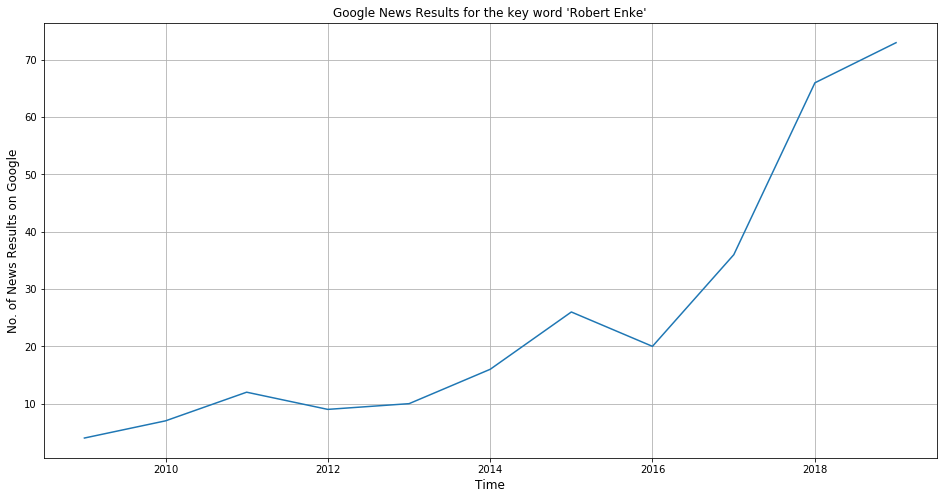

In [237]:
no_of_news=df.groupby("date_2").count()
fig,sub=plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x=no_of_news.index,y=no_of_news["title"],ax=sub)
sub.grid()
sub.set_ylabel("No. of News Results on Google",fontdict={"fontsize":12})
sub.set_xlabel("Time",fontdict={"fontsize":12})
sub.set_title("Google News Results for the key word 'Robert Enke'")

In [238]:
df=df.drop("Unnamed: 0",axis=1)

In [239]:
df.columns

Index(['title', 'media', 'date', 'description', 'link', 'year', 'date_2'], dtype='object')

In [240]:
df_value_counts=df["media"].value_counts()

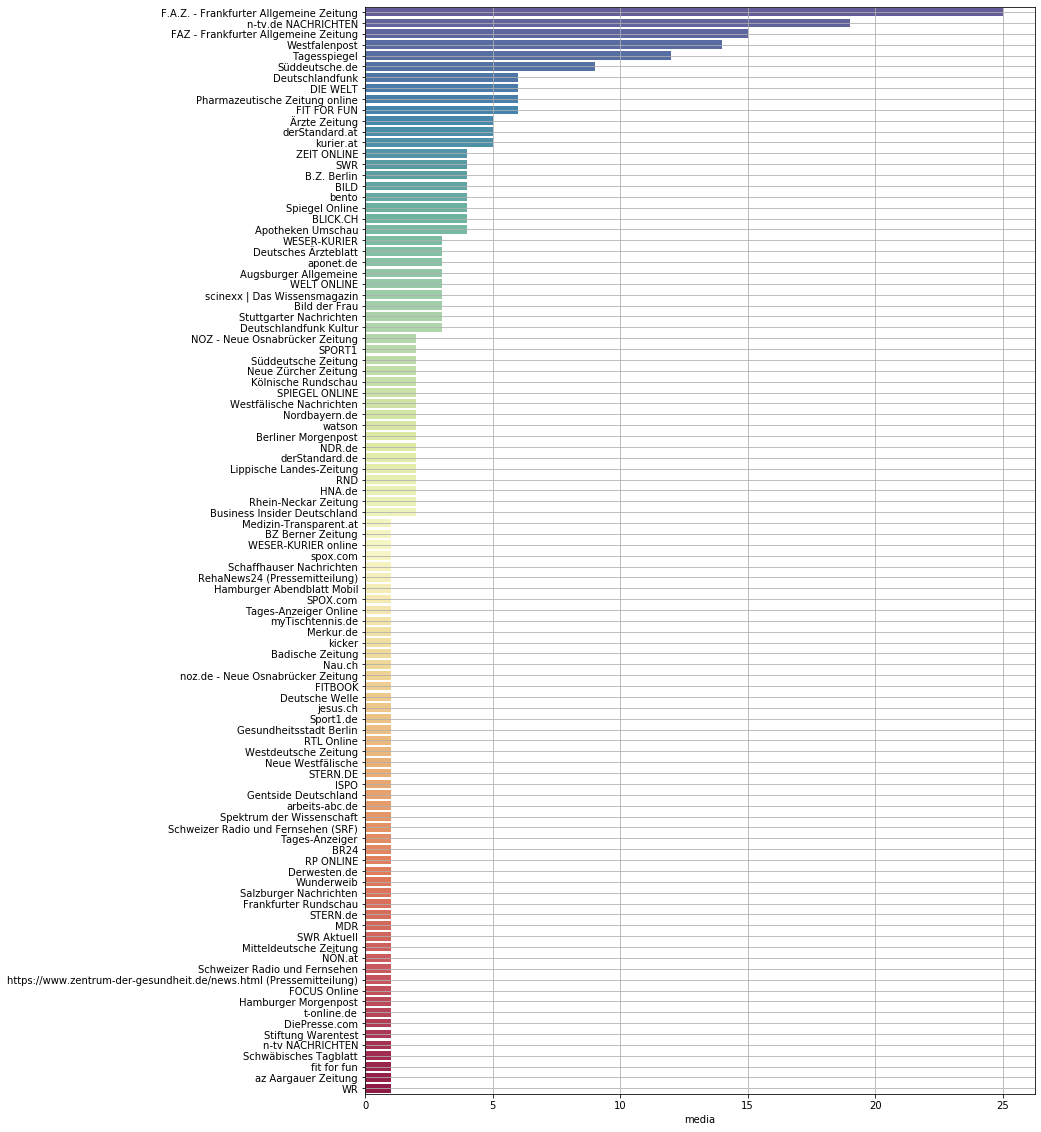

In [241]:
fig,sub=plt.subplots(1,1,figsize=(12,20))
sns.barplot(x=df_value_counts,y=df_value_counts.index,orient="horizontal",ax=sub,palette="Spectral_r")
sub.grid();

In [242]:
df_19=df[df["date_2"]<pd.to_datetime("2010",format="%Y")]

In [243]:
df_19.shape

(4, 7)

In [210]:
word_list=[]

for i in range(0,45,1):
    [word_list.append(word) for word in df_19.iloc[i].loc["description"].split()]

In [211]:
text=" ".join(word_list)

In [212]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopset = stopwords.words('german')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbwes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
clear

(-0.5, 1199.5, 999.5, -0.5)

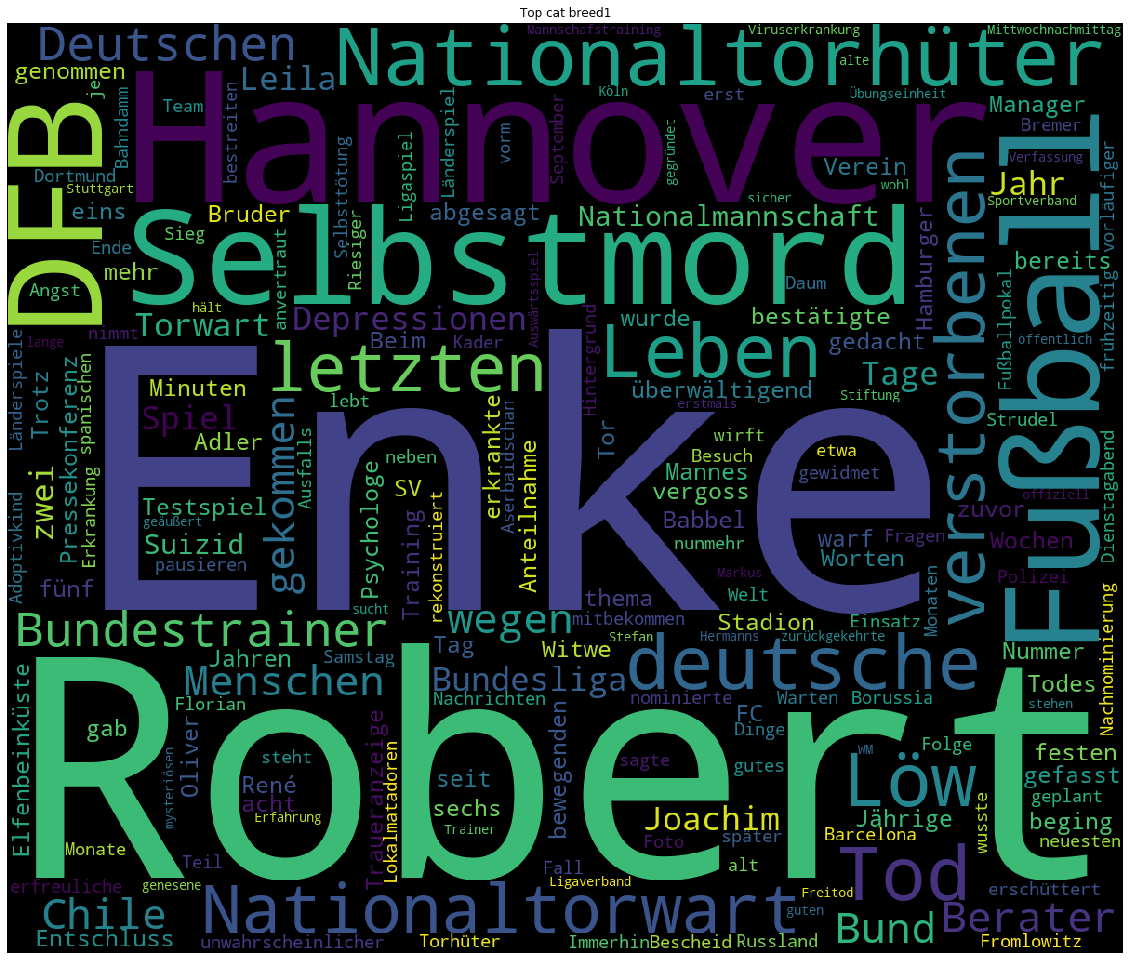

In [214]:
fig,sub1=plt.subplots(1,1,figsize=(20,18))

wordcloud=WordCloud(stopwords=stopset,max_font_size=None,background_color="black",collocations=False,width=1200,height=1000).generate(text)
sub1.imshow(wordcloud)
sub1.set_title("Top cat breed1")
sub1.axis("off")

# Stichwortsuche Depressionen im Sport

In [215]:
googlenews = GoogleNews(lang='de',period="d",start='01/01/2009',end='12/31/2019')
googlenews.search('allintext:Depression+Sport')

In [216]:
attributes=["title","media","date","description","link"]
json_list=[]

for page_no in tqdm(range(1,100)):
    googlenews.getpage(page_no)
    for search_result in googlenews.result():
        json_file={k:np.nan for k in attributes}

        json_file["title"]=search_result["title"]
        json_file["media"]=search_result["media"]
        json_file["date"]=search_result["date"]
        json_file["description"]=search_result["desc"]
        json_file["link"]=search_result["link"]

        json_list.append(json_file)
    googlenews.clear()

100%|██████████| 99/99 [05:48<00:00,  3.52s/it]


In [217]:
df=pd.DataFrame(json_list)

In [218]:
df.shape

(291, 5)

In [219]:
df["title"].unique()[-5:]

array(['Das Netz diskutiert rege: Welche Farben hat dieser Schuh?',
       'Kardashian-Schwester Kylie Jenner bringt Mädchen zur Welt',
       'Modernster Schießstand Südwestfalens steht in Wittgenstein',
       'Silvester 2019: Warum Bleigießen verboten ist',
       '„Inge“ spürt verlassene Firmen, Schlachthöfe und Villen auf'],
      dtype=object)

In [220]:
df["year"]=df["date"].apply(lambda x: x[-4:])

In [221]:
with pd.ExcelWriter(r'C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Depression_im_Sport].xlsx') as writer:
    df.to_excel(writer)

In [ ]:
df=pd.read_excel(r"C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Depression_im_Sport].xlsx")

In [222]:
df["date_2"]=df.apply(lambda x: pd.to_datetime(int(x["year"]),format="%Y"),axis=1)

Text(0.5, 1.0, "Google News Results for the key word 'Depression im Sport'")

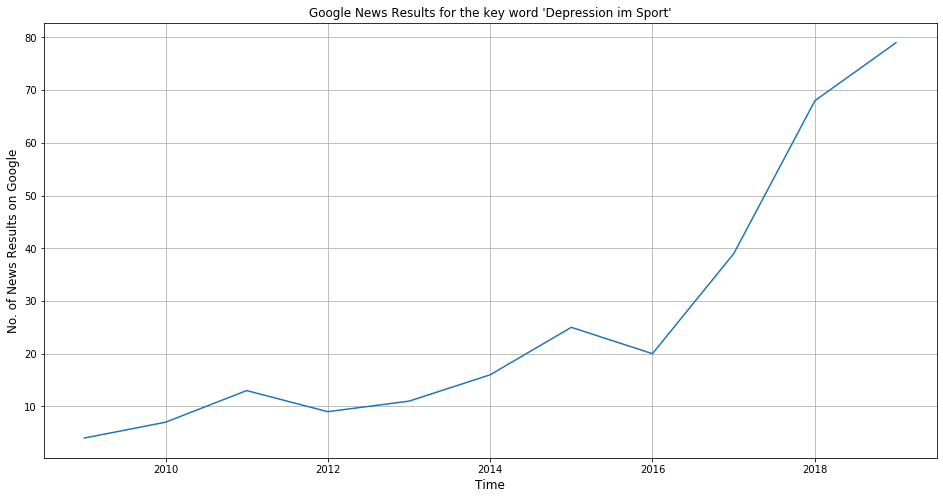

In [223]:
no_of_news=df.groupby("date_2").count()
fig,sub=plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x=no_of_news.index,y=no_of_news["title"],ax=sub)
sub.grid()
sub.set_ylabel("No. of News Results on Google",fontdict={"fontsize":12})
sub.set_xlabel("Time",fontdict={"fontsize":12})
sub.set_title("Google News Results for the key word 'Depression im Sport'")

In [224]:
df.head()

,title,media,date,description,link,year,date_2
0,Depression im Sport: Robert Enke ist kein Einz...,NDR.de,7 nov. 2019,,https://www.ndr.de/sport/fussball/Depression-i...,2019,2019-01-01
1,"Enkes zehnter Todestag: ""Was wäre, wenn ...?""",NDR.de,10 nov. 2019,,https://www.ndr.de/sport/fussball/Zehnter-Tode...,2019,2019-01-01
2,Sport ist signifikant wirksam,Pharmazeutische Zeitung online,21 févr. 2018,Bewegung wird daher auch in der Nationalen Ver...,https://www.pharmazeutische-zeitung.de/ausgabe...,2018,2018-01-01
3,Sport hilft so gut wie Antidepressivum,Ärzte Zeitung,2 déc. 2013,Moderater Nutzen bei Depressionen. Als Maß für...,https://www.aerztezeitung.de/Medizin/Sport-hil...,2013,2013-01-01
4,Sport vertreibt selbst schwere Depressionen,FOCUS Online,25 août 2011,Den Betroffenen einer Depression geht es nach ...,https://www.focus.de/gesundheit/ratgeber/depre...,2011,2011-01-01


# Stichwortsuche Depressionen im Fussball

In [134]:
googlenews.clear()

In [135]:
googlenews = GoogleNews(lang='de',period="d",start='01/01/2009',end='12/31/2019')
googlenews.search('robert enke')

In [136]:
googlenews.getpage(2)

In [137]:
googlenews.result()

[]

In [133]:
clear